## Download files

Please download the genome 

https://www.ncbi.nlm.nih.gov/geo/download/?format=file&type=rnaseq_counts&file=Human.GRCh38.p13.annot.tsv.gz

and put as raw/L_Homo_sapiens.GRCh38.110.gtf

In [19]:
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE183nnn/GSE183984/soft/GSE183984_family.soft.gz
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE183nnn/GSE183984/miniml/GSE183984_family.xml.tgz
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE183nnn/GSE183984/matrix/GSE183984_series_matrix.txt.gz
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE183nnn/GSE183984/suppl/GSE183984_ASAN_RNASEQ_FPKM_ensg.csv.gz
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE183nnn/GSE183984/suppl/GSE183984_ASAN_RNASEQ_raw_counts_ensg.csv.gz
# !wget https://www.ncbi.nlm.nih.gov/geo/download/?type=rnaseq_counts&acc=GSE183984&format=file&file=GSE183984_raw_counts_GRCh38.p13_NCBI.tsv.gz
# !wget https://www.ncbi.nlm.nih.gov/geo/download/?type=rnaseq_counts&acc=GSE183984&format=file&file=GSE183984_norm_counts_FPKM_GRCh38.p13_NCBI.tsv.gz
# !wget https://www.ncbi.nlm.nih.gov/geo/download/?type=rnaseq_counts&acc=GSE183984&format=file&file=GSE183984_norm_counts_TPM_GRCh38.p13_NCBI.tsv.gz
# !wget https://www.ncbi.nlm.nih.gov/geo/download/?format=file&type=rnaseq_counts&file=Human.GRCh38.p13.annot.tsv.gz

--2025-04-25 17:40:33--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE183nnn/GSE183984/soft/GSE183984_family.soft.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 130.14.250.31, 130.14.250.7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7650 (7.5K) [application/x-gzip]
Saving to: ‘GSE183984_family.soft.gz’

GSE183984_family.so 100%[===================>]   7.47K  --.-KB/s    in 0s      

2025-04-25 17:40:34 (49.1 MB/s) - ‘GSE183984_family.soft.gz’ saved [7650/7650]

--2025-04-25 17:40:34--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE183nnn/GSE183984/miniml/GSE183984_family.xml.tgz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 130.14.250.10, 130.14.250.11, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7942 (7.8K) [application/x-gzip]
S

In [20]:
!gunzip *.gz
!tar -xzf GSE183984_family.xml.tgz -C ../raw && rm GSE183984_family.xml.tgz 
!mv *.csv ../raw
!mv *.soft ../raw
!mv *.xml ../raw
!mv *.txt ../raw
!mv *.tsv ../raw

mv: cannot stat '*.xml': No such file or directory
mv: cannot stat '*.tsv': No such file or directory


# Imports

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import GEOparse as Geo
import seaborn as sns
# from sanbomics import annotate
os.getcwd()

'/home/max/mcrc-cetuximab-analysis/notebooks'

# Annotation

Collect annotation (there is only 1 device used, rest of data is in the ann.csv table)

In [22]:
gse = Geo.get_GEO(filepath="../raw/GSE183984_family.soft", silent=True)
print(gse.gpls)
for key in gse.gsms:
    df = pd.DataFrame(columns=gse.gsms[key].metadata.keys())
    break

for key in gse.gsms:
    df = pd.concat([df, pd.DataFrame([gse.gsms[key].metadata], index=[key])])

df.to_csv("../data/ann.csv", index=True)

df = pd.read_csv("../data/ann.csv")
df = df.rename(columns={'Unnamed: 0': 'sample_id'})
df = df.set_index('sample_id')

df.to_csv("../data/ann.csv", index=True)

df

{'GPL16791': <d: GPL16791>}


,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,contact_zip/postal_code,contact_country,instrument_model,library_selection,library_source,library_strategy,relation,supplementary_file_1,series_id,data_row_count
sample_id,,,,,,,,,,,,,,,,,,,,,
GSM5575333,['POST-R-001 [18R649_010]'],['GSM5575333'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
GSM5575334,['PAIR-R-001-pre [18R654_15]'],['GSM5575334'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
GSM5575335,['PAIR-R-001 [18R655_016]'],['GSM5575335'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
GSM5575336,['POST-R-002 [18R669_01]'],['GSM5575336'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
GSM5575337,['PAIR-R-002 [18R670_02]'],['GSM5575337'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5575441,['PRE-R-051 [18R454_027]'],['GSM5575441'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
GSM5575442,['PRE-R-052 [18R477_019]'],['GSM5575442'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']
GSM5575443,['PRE-10 [18R507_004]'],['GSM5575443'],['Public on Sep 16 2021'],['Sep 12 2021'],['Sep 16 2021'],['SRA'],['1'],['colorectal cancer'],['Homo sapiens'],['9606'],...,['05505'],['South Korea'],['Illumina HiSeq 2500'],['cDNA'],['transcriptomic'],['RNA-Seq'],['BioSample: https://www.ncbi.nlm.nih.gov/bios...,['NONE'],['GSE183984'],['0']


# Examine raw counts/FPKM data

In [23]:
fpkms_df = pd.read_csv("../raw/GSE183984_ASAN_RNASEQ_FPKM_ensg.csv", index_col=0).T
raw_counts_df = pd.read_csv("../raw/GSE183984_ASAN_RNASEQ_raw_counts_ensg.csv", index_col=0).T

print(fpkms_df.shape)
print(raw_counts_df.shape)

# Check that columns are the same in TPM and FPKM
print(set(fpkms_df.columns) - set(raw_counts_df.columns))
print(set(raw_counts_df.columns) - set(fpkms_df.columns))

print(''.join(list(raw_counts_df.columns)).find('T')) # no transcript level distinction
# but somehow many genes???

(113, 58735)
(113, 58735)
set()
set()
-1


# Count lengths of genes

In [24]:
# Alternative to genome attached to experiment
# Works same way
# !wget https://ftp.ensembl.org/pub/current_gtf/homo_sapiens/Homo_sapiens.GRCh38.113.gtf.gz
# !gzip -d Homo_sapiens.GRCh38.113.gtf.gz
# !mv Homo_sapiens.GRCh38.113.gtf ../data/L_Homo_sapiens.GRCh38.113.gtf

Total genes:  62754
Total protein-coding genes:  20070


<Axes: ylabel='Count'>

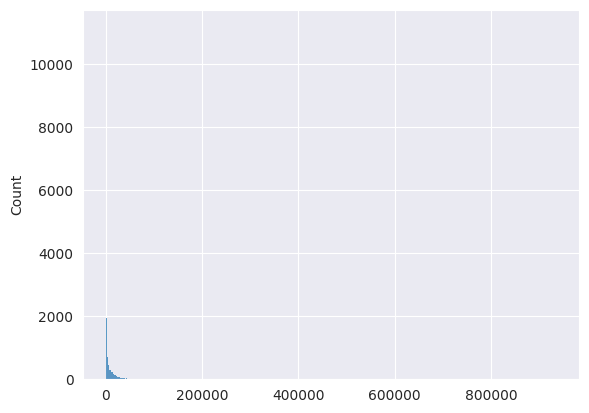

In [33]:
from collections import Counter

def parse_gtf_gene_lengths(gtf_path):
    res = Counter()
    with open(gtf_path, "r") as f:
        for li, line in enumerate(f):
            # print(line)
            if line.startswith("#"):
                continue
            parts = line.strip().split()
            if len(parts) > 10:
                if parts[2] == 'exon':
                    gene = parts[9][1:-2]
                    res[gene] += int(parts[4]) - int(parts[3]) + 1
    return res


def get_protein_coding_genes(gtf_path):
    res = set()
    with open(gtf_path, "r") as f:
        for li, line in enumerate(f):
            # print(line)
            if line.startswith("#"):
                continue
            parts = line.strip().split()
            if len(parts) > 10:
                if '"protein_coding";' in parts:
                    gene = parts[9][1:-2]
                    res.add(gene)
    return res

gene_lengths = parse_gtf_gene_lengths('../raw/L_Homo_sapiens.GRCh38.110.gtf')
protein_coding_genes = get_protein_coding_genes('../raw/L_Homo_sapiens.GRCh38.110.gtf')
print('Total genes: ', len(gene_lengths))
print('Total protein-coding genes: ', len(protein_coding_genes))
sns.histplot(gene_lengths)

Remove genes not in dataset from gene_lengths and protein_coding_gene_lengths

In [37]:
new_gene_lengths = dict()
for gene, l in gene_lengths.items():
    if gene in raw_counts_df.columns:
        new_gene_lengths[gene] = l
gene_lengths = new_gene_lengths

protein_coding_genes = list(set(protein_coding_genes).intersection(set(gene_lengths.keys())))
protein_coding_gene_lengths = {k: gene_lengths[k] for k in protein_coding_genes}

print(len(gene_lengths), len(protein_coding_genes))

19855 19855


# Check & process FPKM/counts/TPM data

Remove genes that are not in human genes annotation (maybe have to remove all non-protein-coding)

In [38]:
raw_counts_df.shape, fpkms_df.shape

((113, 19855), (113, 19855))

In [39]:
raw_counts_df = raw_counts_df[gene_lengths.keys()]
fpkms_df = fpkms_df[gene_lengths.keys()]

raw_counts_df = raw_counts_df[protein_coding_genes]
fpkms_df = fpkms_df[protein_coding_genes]

raw_counts_df.shape, fpkms_df.shape

((113, 19855), (113, 19855))

In [40]:
# annotations = annotate(fpkms_df.index.tolist(), species="human", ensembl=True)
# annotations_df = pd.DataFrame(annotations)
# annotations_df
# # protein_coding_ids = annotations_df[annotations_df["biotype"] == "protein_coding"]["ensembl"].values

Convert raw counts to TPM and get FPKM from counts to check if it matches.

In [41]:
def counts_to_tpm(counts):
    gl_df = pd.Series(protein_coding_gene_lengths)
    tpm = counts / (gl_df / 1000)
    tpm = (tpm.T / tpm.sum(axis=1)).T * 1_000_000
    print('Nans: ', tpm.isna().sum().sum())
    # print(tpm)
    return tpm

def counts_to_fpkm(counts):
    gl_df = pd.Series(protein_coding_gene_lengths)
    fpkm = (counts.T / counts.sum(axis=1)).T * 1_000_000
    fpkm = fpkm / (gl_df / 1000)
    print('Nans: ', fpkm.isna().sum().sum())
    # print(tpm)
    return fpkm

print(raw_counts_df.shape)

tpm = counts_to_tpm(raw_counts_df)

fpkm_from_counts = counts_to_fpkm(raw_counts_df)


(113, 19855)
Nans:  0
Nans:  0


In [42]:
fpkm_from_counts

name,ENSG00000104267,ENSG00000002834,ENSG00000181104,ENSG00000104356,ENSG00000204843,ENSG00000203972,ENSG00000120341,ENSG00000249104,ENSG00000135720,ENSG00000124713,...,ENSG00000100490,ENSG00000175600,ENSG00000240021,ENSG00000142949,ENSG00000112972,ENSG00000100568,ENSG00000239697,ENSG00000155090,ENSG00000256294,ENSG00000163554
18R176_0020,1.522235,3.641300,14.426825,5.065441,3.451265,0.000000,0.443756,0.000000,5.210235,0.018802,...,0.382255,1.252924,0.012665,3.017307,8.564584,2.881350,0.029973,6.056241,1.152263,0.050189
18R177_0021,63.654002,3.658483,5.623455,3.252181,2.212880,0.000000,0.440299,0.000000,5.734257,0.336841,...,0.695132,0.330795,0.017913,3.820999,4.619433,2.257510,0.023141,3.011972,1.079000,0.000000
18R178_0022,2.213797,4.286322,10.103603,7.880209,2.638209,0.000000,1.626146,0.000000,6.511584,1.137172,...,0.487426,0.405347,0.000000,1.871166,5.878996,2.504873,0.007772,4.714362,1.412932,0.013861
18R296_0008,11.367089,3.027829,8.117550,3.326126,2.231547,0.000000,1.808346,0.000000,6.842410,0.000000,...,0.391932,0.204729,0.000000,2.732601,6.515249,1.975563,0.072811,7.148438,0.999127,0.000000
18R301_0002,16.384346,4.488182,16.980968,2.657896,3.438487,0.010127,0.714693,0.000000,6.549197,0.000000,...,0.638841,0.128127,0.000000,3.824356,10.092029,2.719716,0.065849,3.855054,0.643238,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18R309_0015,13.111605,7.925069,10.653465,1.887708,3.509223,0.000000,3.274303,0.000000,5.235171,25.475421,...,0.259198,0.968601,0.000000,5.703088,9.173851,2.588741,0.020766,3.470259,0.327487,0.007597
18R310_0016,6.018354,3.962002,43.821835,1.819505,2.250109,0.000000,0.958251,0.014308,5.435495,10.292726,...,0.234833,0.906603,0.000000,2.077145,4.631498,2.316174,0.063085,8.738911,0.794301,0.013181
18R311_0018,6.124207,4.367715,29.520984,2.828603,4.213488,0.000000,3.776287,0.000000,5.753658,2.418837,...,0.374842,0.290696,0.002889,3.138153,2.862460,2.647107,0.162069,4.969850,1.411697,0.083260
18R318_0005,2.972387,3.237377,21.390049,3.256634,2.555860,0.000000,1.366370,0.000000,6.613475,0.000000,...,0.562683,0.928911,0.006064,2.400455,9.067043,3.089061,0.041932,8.875254,0.869716,0.017475


In [43]:
fpkms_df

,ENSG00000104267,ENSG00000002834,ENSG00000181104,ENSG00000104356,ENSG00000204843,ENSG00000203972,ENSG00000120341,ENSG00000249104,ENSG00000135720,ENSG00000124713,...,ENSG00000100490,ENSG00000175600,ENSG00000240021,ENSG00000142949,ENSG00000112972,ENSG00000100568,ENSG00000239697,ENSG00000155090,ENSG00000256294,ENSG00000163554
18R176_0020,3.971584,28.420160,12.253017,15.011891,114.782670,0.000000,2.185790,0.000000,39.628061,0.016246,...,4.243795,9.847550,0.039355,26.250659,56.114361,19.106313,0.709311,10.083888,3.256451,0.085760
18R177_0021,200.831939,43.617509,5.900218,13.231770,76.209997,0.000000,2.488323,0.000000,106.422305,0.359322,...,15.756750,3.042690,0.245554,46.545942,44.547859,24.892582,0.997231,6.178131,4.399265,0.000000
18R178_0022,7.245306,32.244543,8.478901,24.897550,83.282718,0.000000,6.250034,0.000000,85.608291,0.961609,...,5.957049,2.042565,0.000000,19.702544,46.186783,18.726467,0.283154,7.702824,3.828486,0.170474
18R296_0008,28.283305,23.087301,7.428473,8.936346,83.720489,0.000000,7.562866,0.000000,64.374668,0.000000,...,5.166408,0.993192,0.000000,34.724704,41.892428,15.958403,2.570822,12.790061,3.675536,0.000000
18R301_0002,38.524609,38.469490,15.382396,7.794531,156.637990,0.022857,3.232623,0.000000,70.484987,0.000000,...,8.648021,0.634371,0.000000,41.545989,74.513048,22.432279,1.185415,6.830619,2.048949,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18R309_0015,41.200114,94.673832,11.140978,14.622873,141.292025,0.000000,14.900666,0.000000,92.184578,27.547508,...,3.446100,5.177999,0.000000,75.444870,93.614748,25.769228,0.753058,7.132107,1.609247,0.011843
18R310_0016,19.793952,40.153124,47.512482,10.498767,120.633197,0.000000,4.991818,0.019262,88.710507,11.386280,...,2.552391,5.642121,0.000000,27.778284,34.333614,16.757141,2.309829,18.556431,3.930391,0.146517
18R311_0018,14.446228,41.576956,27.435139,10.991956,127.124714,0.000000,15.143148,0.000000,87.328696,2.322058,...,5.630376,1.621677,0.009832,32.850726,21.154257,17.488745,6.510192,9.006678,5.777609,0.294246
18R318_0005,9.863804,24.972058,18.037494,13.958424,114.615082,0.000000,4.749535,0.000000,72.726591,0.000000,...,5.193033,5.805922,0.019235,28.286508,52.742072,27.580579,0.520175,14.587569,2.629096,0.215793


Check that FPKM is correct (sums to 1 after multiplying by gene length and dividing on 10^6)

In [15]:
# should be sum 1 in every row
print((fpkm_from_counts * (pd.Series(gene_lengths) / 1000)).sum(axis=1) / 10 ** 6)
print((fpkms_df * (pd.Series(gene_lengths) / 1000)).sum(axis=1) / 10 ** 6)

18R176_0020    1.0
18R177_0021    1.0
18R178_0022    1.0
18R296_0008    1.0
18R301_0002    1.0
              ... 
18R309_0015    1.0
18R310_0016    1.0
18R311_0018    1.0
18R318_0005    1.0
18R319_0014    1.0
Length: 113, dtype: float64
18R176_0020    15.705038
18R177_0021    14.861433
18R178_0022    15.592579
18R296_0008    15.869559
18R301_0002    16.272554
                 ...    
18R309_0015    18.328290
18R310_0016    18.725444
18R311_0018    16.031441
18R318_0005    15.113374
18R319_0014    15.768968
Length: 113, dtype: float64


Get log-tpms and plot gene expression distribution for individual sample / average

(0.0, 1000.0)

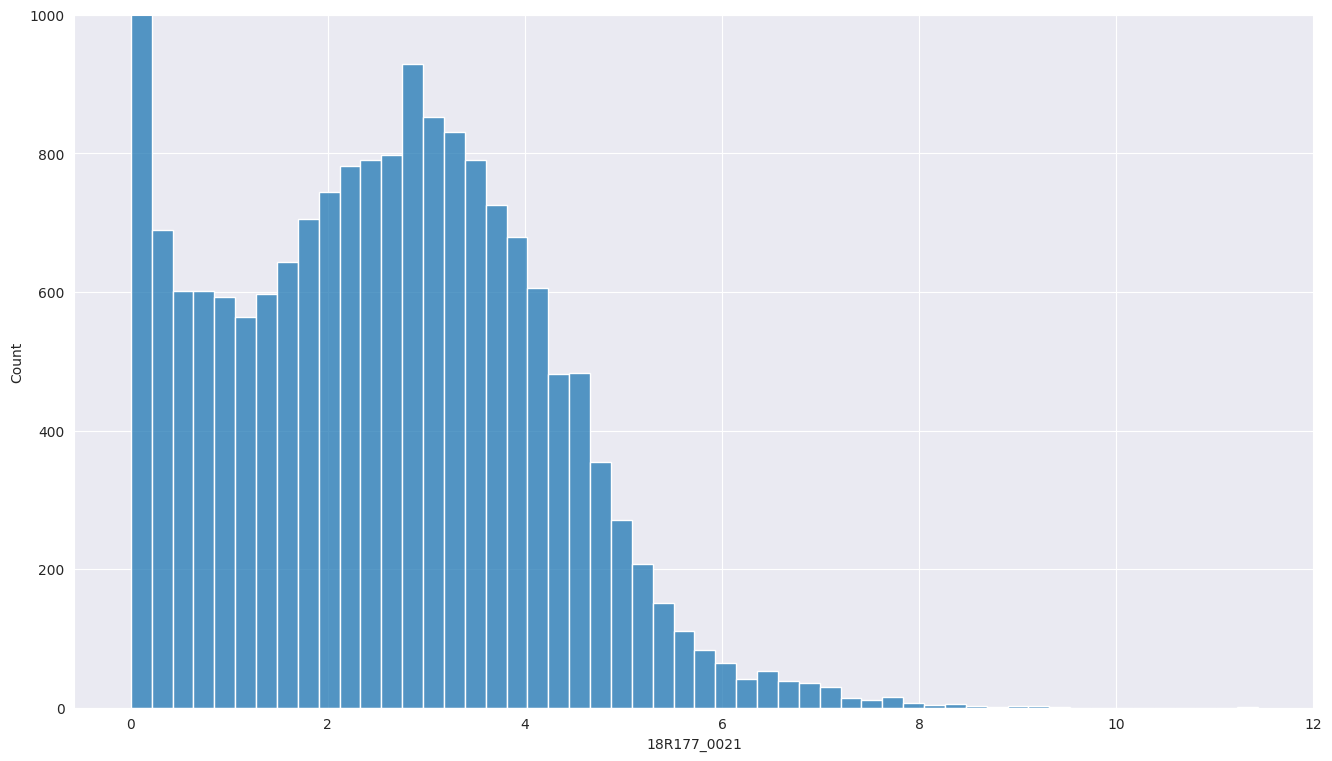

In [16]:
log_tpm = tpm.apply(lambda x: np.log(1 + x))
plt.figure(figsize=(16, 9))
sns.histplot(log_tpm.iloc[1])
plt.ylim(0, 1000)

(0.0, 1000.0)

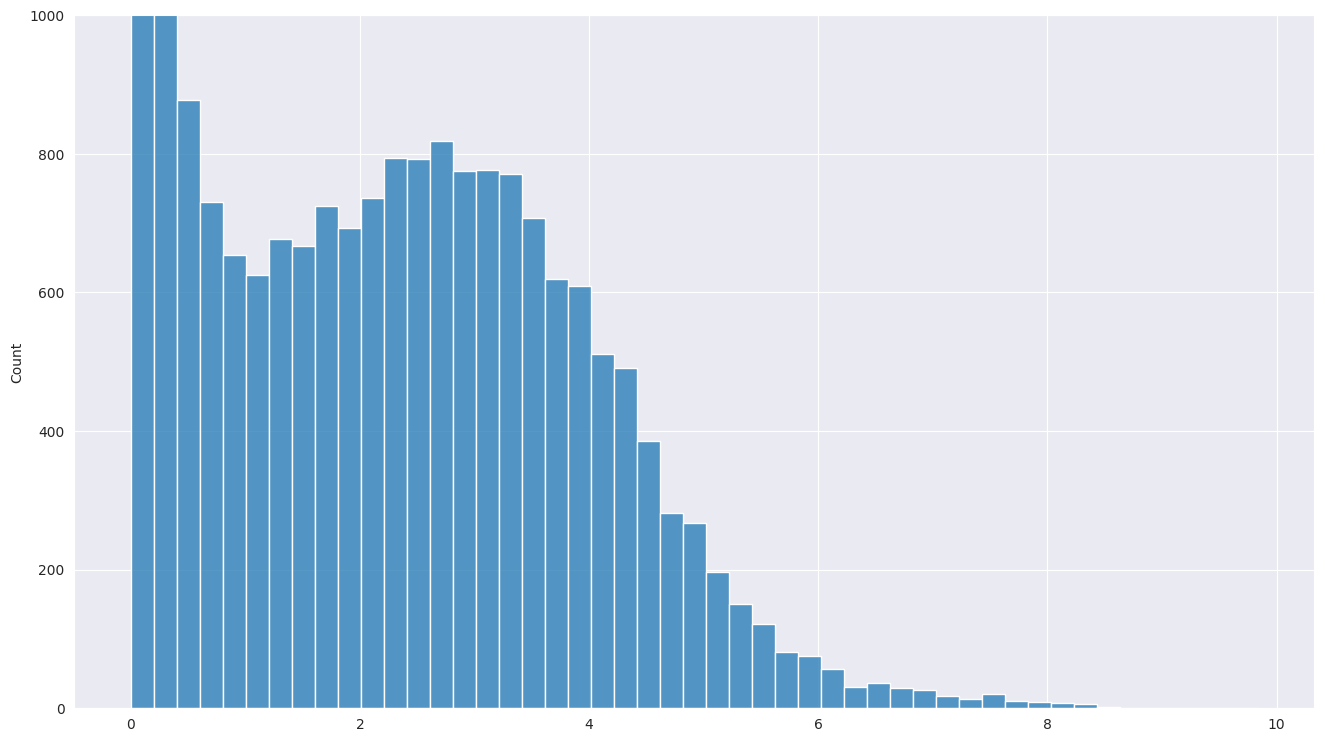

In [17]:
plt.figure(figsize=(16, 9))
sns.histplot(log_tpm.mean())
plt.ylim(0, 1000)

In [ ]:
from time import time
import mygene

mg = mygene.MyGeneInfo()

# Example list of Ensembl gene IDs
ensembl_ids = log_tpm.columns

t1 = time()
# Query
result = mg.querymany(ensembl_ids, scopes="ensembl.gene", fields="symbol", species="human")
t2 = time()
print(t2-t1)

# Convert to dict: {ensembl_id: gene_symbol}
id_to_name = {item['query']: item.get('symbol', None) for item in result}

log_tpm = log_tpm.rename(columns=id_to_name)
log_tpm.to_csv('../data/log_tpm_hgvs.csv')

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
